## Load and Clean Data

In [1]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt  

Using TensorFlow backend.


In [2]:
reddit = pd.read_json("./data.json")

In [3]:
len(reddit.title)

993

In [4]:
comm_len = [len(x) for x in reddit.comments]

In [5]:
np.clip(comm_len, a_min= 0, a_max=2000)

array([237, 267, 437, 262, 207, 209, 270, 142, 283, 135, 177,  99, 174,
       144, 215, 265, 208, 140, 314, 305, 157, 176, 127, 192, 114, 114,
       140,  94, 163, 140, 171, 179, 169, 132, 182,  71, 100, 115, 132,
       105, 128, 252, 116,  75, 115, 174, 160, 217, 141, 102, 160,  77,
        74,  92,  54, 190, 179, 165, 141,  87, 100,  84, 143, 115, 141,
       171, 187,  95, 143,  94,  88,  32,  90,  47, 103,  59,  81, 102,
        90,  69, 114,  81,  55, 116,  88, 133,  70,  77,  76,  74, 108,
        41,  95,  92,  93,  57, 110,  85,  92, 134,  83,  39, 105,  92,
        67,  62,  89,  62,  53,  89,  82,  71,  51,  69,  77,  26, 103,
        36,  84,  67, 100,  49,  84,  75,  54, 113, 101,  89,  47,  53,
        54,  71,  76,  68,  97,  74, 121,  29,  92,  83,  71,  59,  82,
        33,  70,  40,  81,  78,  78,  43,  50,  38,  65,  40,  46,  33,
        83,  38,  24,  41,  68,  63,  20,  52,  46,  54,  66,  55,  43,
        93,  71,  91,  55,  38,  35,  47,  44,  71,  74,  56,  4

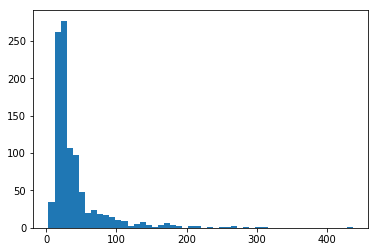

In [6]:
plt.hist(np.clip(comm_len, a_min= 0, a_max=2000), bins=50)
plt.show()

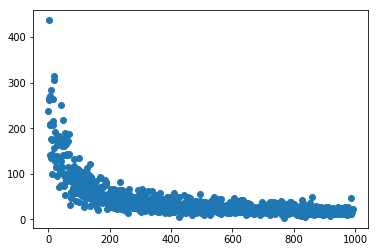

In [7]:
plt.scatter([i for i in range(len(comm_len))], comm_len)

In [8]:
reddit.comments = [x[:40] for x in reddit.comments]

In [9]:
lst_col_ga = 'comments'

df = reddit

reddit = pd.DataFrame({
     col:np.repeat(df[col].values, df[lst_col_ga].str.len())
     for col in df.columns.drop(lst_col_ga)}
   ).assign(**{lst_col_ga:np.concatenate(df[lst_col_ga].values)})[df.columns].dropna().reset_index(drop = True)

In [10]:
reddit

,comments,title,url
0,"I don’t even know what to say, r/ToastMe commu...",I wanted to share a big milestone for me. When...,https://i.redd.it/y2u2a7gxuuj21.jpg
1,Happy birthday ! I love your smile 💕,I wanted to share a big milestone for me. When...,https://i.redd.it/y2u2a7gxuuj21.jpg
2,Happy birthday! Congratulations on making it t...,I wanted to share a big milestone for me. When...,https://i.redd.it/y2u2a7gxuuj21.jpg
3,"It makes me happy to see you smile, after ever...",I wanted to share a big milestone for me. When...,https://i.redd.it/y2u2a7gxuuj21.jpg
4,happy birthday! i’m so glad that you are still...,I wanted to share a big milestone for me. When...,https://i.redd.it/y2u2a7gxuuj21.jpg
5,"Happy birthday! I’m so glad you could make it,...",I wanted to share a big milestone for me. When...,https://i.redd.it/y2u2a7gxuuj21.jpg
6,Happy Birthday and congratulations for living ...,I wanted to share a big milestone for me. When...,https://i.redd.it/y2u2a7gxuuj21.jpg
7,Hooray and many happy returns on a milestone d...,I wanted to share a big milestone for me. When...,https://i.redd.it/y2u2a7gxuuj21.jpg
8,That's awesome to hear!!! I'm glad you're stil...,I wanted to share a big milestone for me. When...,https://i.redd.it/y2u2a7gxuuj21.jpg
9,Happy birthday!! Your smile is super contagiou...,I wanted to share a big milestone for me. When...,https://i.redd.it/y2u2a7gxuuj21.jpg


In [12]:
cleaned_pairs = reddit[["comments", "title"]].values

In [13]:
cleaned_pairs.shape

(27430, 2)

In [14]:
cleaned_pairs[0, 0]

'I don’t even know what to say, r/ToastMe community. You have all blown my mind and touched my heart. When I posted this I was just sharing. Little bit of myself and didn’t expect much response cause there are others who deserve love and are going through tough times.\n\nI absolutely did not expect to have people share so much love with me. I didn’t expect so many to tell me that a smile and a story was helping them with tough times. I didn’t expect to switch between smiling until my cheeks hurt and shedding loving tears because of the absolute love that was sent my way. \n\nA beautiful soul gifted me with a Gold Award, another gifted me with a Platinum Award... I never thought anyone would ever think I deserved such things because they cost real money to gift. I am astonished. \n\nTo everyone who has upvotes this, commented such beautiful compliments, and so many who shared their own stories and pains and achievements, thank you all so freaking much. I am humbled beyond words by you a

In [15]:
cleaned_pairs[0, 1]

'I wanted to share a big milestone for me. When I was deep in my depression for over a decade I had planned to disappear and quietly commit suicide at age 39. I battled depression and found reasons to live. Today I turned 40 and can now assure my past self that it DOES get better. Toast if you want.'

# Load, Reduce, and Split Clean Data

In [16]:
from pickle import load
from pickle import dump
from numpy.random import rand
from numpy.random import shuffle

# # load a clean dataset
# def load_clean_sentences(filename):
#     return load(open(filename, 'rb'))

# # save a list of clean sentences to file
def save_clean_data(sentences, filename):
    dump(sentences, open(filename, 'wb'))
    print('Saved: %s' % filename)

# # load dataset
# raw_dataset = load_clean_sentences('english-german.pkl')

# reduce dataset size
n_sentences = 10000
dataset =  cleaned_pairs   #raw_dataset[:n_sentences, :]
# random shuffle
shuffle(dataset)
# split into train/test
train, test = dataset[:600], dataset[600:]
# save
save_clean_data(dataset, 'english-german-both.pkl')
save_clean_data(train, 'english-german-train.pkl')
save_clean_data(test, 'english-german-test.pkl')

Saved: english-german-both.pkl
Saved: english-german-train.pkl
Saved: english-german-test.pkl


## Train

In [17]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# one hot encode target sequence
def encode_output(sequences, vocab_size):
	ylist = list()
	for sequence in sequences:
		encoded = to_categorical(sequence, num_classes=vocab_size)
		ylist.append(encoded)
	y = array(ylist)
	y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
	return y

# define NMT model
def define_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
#     cnn = keras.applications.vgg19.VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
    
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True))
	model.add(LSTM(n_units))
	model.add(RepeatVector(tar_timesteps))
	model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

# load datasets
dataset = load_clean_sentences('english-german-both.pkl')
train = load_clean_sentences('english-german-train.pkl')
test = load_clean_sentences('english-german-test.pkl')

# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % (eng_length))
# prepare german tokenizer
ger_tokenizer = create_tokenizer(dataset[:, 1])
ger_vocab_size = len(ger_tokenizer.word_index) + 1
ger_length = max_length(dataset[:, 1])
print('German Vocabulary Size: %d' % ger_vocab_size)
print('German Max Length: %d' % (ger_length))

# prepare training data
trainX = encode_sequences(ger_tokenizer, ger_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])
trainY = encode_output(trainY, eng_vocab_size)
# prepare validation data
testX = encode_sequences(ger_tokenizer, ger_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])
testY = encode_output(testY, eng_vocab_size)

# define model
model = define_model(ger_vocab_size, eng_vocab_size, ger_length, eng_length, 256)
model.compile(optimizer='adam', loss='categorical_crossentropy')
# summarize defined model
print(model.summary())
#plot_model(model, to_file='model.png', show_shapes=True)
# fit model
filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(trainX, trainY, epochs=11, batch_size=64, validation_data=(testX, testY), callbacks=[checkpoint], verbose=2)

English Vocabulary Size: 21511
English Max Length: 1540
German Vocabulary Size: 3361
German Max Length: 64


MemoryError: 

# Evaluation

In [ ]:
from pickle import load
from numpy import array
from numpy import argmax
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src = raw_dataset[i]
		if i < 10:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load datasets
dataset = load_clean_sentences('english-german-both.pkl')
train = load_clean_sentences('english-german-train.pkl')
test = load_clean_sentences('english-german-test.pkl')
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
# prepare german tokenizer
ger_tokenizer = create_tokenizer(dataset[:, 1])
ger_vocab_size = len(ger_tokenizer.word_index) + 1
ger_length = max_length(dataset[:, 1])
# prepare data
trainX = encode_sequences(ger_tokenizer, ger_length, train[:, 1])
testX = encode_sequences(ger_tokenizer, ger_length, test[:, 1])

# load model
model = load_model('model.h5')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test)

## Questions

### How much effort is put into data preparation vs. actually training and evaluating the model?
In the the tutorial that we followed, not too much effort was put into data preparation. Most of the effort was simply lowercasing, removing punctuation, removing non-printable characters, and removing numbers. We could do a lot more of data preparation by trying to lemmatize/stem, finding POS tags, getting the dependency parsing, and more. Training and evaluating the model takes the bulk of the effort in this tutorial, as we need to worry about how to create the model and using the BLEU score to evaluate it. 

### What constitutes the input features? What constitutes the top layer?
The input features are made up of tokenized German words. Each word in an example is converted into an arbitrary list of numbers by the Keras Tokenizer. The output is also a list of tokenized words, but these words are in English and then they are also one-hot encoded so they work with the softmax in the model. 

### What does it mean that this is a "generative" classifier? How is that different from a discriminative classifier?
A generative classifier creates output based on both the input data and the previous outputs of the model. This is necessary for our LSTM because it has to generate word w based on word w-1, which it also predicted. A discriminative classifer generates output only based on the input data, and 

### How do you know your model works? What does a BLEU metric tell you? Can you think of a better way to evaluate MT output?
I know that my model works based on the BLEU metrics. This metric tells me how closely the predicted translation matches the target translation. This is not an exact match score, but it gives credit for a translation that is mostly the same. The higher the BLEU score, the better the predicted translation matches the target translation. There are different BLEU metrics for the different n-grams (BLEU-1, BLEU-2, etc). 

In [5]:
from client.api.notebook import Notebook
ok = Notebook('a8.ok')
ok.auth(inline=True)

Assignment: A8 Machine Translation with Keras
OK, version v1.13.11

Successfully logged in as DanieleMoro@u.boisestate.edu


In [6]:
ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'A8-machine-translation-keras.ipynb'.
Submit... 0.0% complete
Could not submit: Assignment does not exist

